# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import MinMaxScaler
import serializer
import socket
import client
from time import sleep
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
import math
import sklearn.metrics

# Connect server

In [2]:
# define server address
SERVER_ADDR = socket.gethostbyname(socket.gethostname())
SERVER_PORT = 1234

# initialize client class
c = client.Client(SERVER_ADDR, SERVER_PORT)

# Getting data

In [3]:
# get_tmp_bsp_values
print("get_tmp_bsp_values_probes")
tmp_values, bsp_values = c.get_tmp_bsp_values_probes()
print("tmp_values: {}x{}, bsp_values: {}x{}".format(len(tmp_values), len(tmp_values[0]), len(bsp_values), len(bsp_values[0])))
print("")

get_tmp_bsp_values_probes
tmp_values: 12000x30, bsp_values: 12000x70



In [4]:
for i in range(0, len(bsp_values[0])):
    for j in range(1,len(bsp_values)-1):
        bsp_values[j][i] = bsp_values[j-1][i]+ 0.0001*bsp_values[j][i]

# Concatenate dataframes

In [5]:
bsp = pd.DataFrame(bsp_values)
tmp = pd.DataFrame(tmp_values)
result = pd.concat([bsp, tmp], axis=1, join='inner')
dataset = result.drop_duplicates(keep='first')
dataset.to_csv('5norm.csv', index = False)
dataset

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,2.274535e-09,2.443224e-11,-7.176948e-09,-1.296379e-08,3.921977e-08,1.014467e-07,-1.340785e-08,-1.582796e-09,-1.171960e-08,-4.491073e-08,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
1,2.274763e-09,2.443468e-11,-7.177666e-09,-1.296508e-08,3.922369e-08,1.014568e-07,-1.340919e-08,-1.582954e-09,-1.172077e-08,-4.491523e-08,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
2,2.274990e-09,2.443713e-11,-7.178384e-09,-1.296638e-08,3.922761e-08,1.014669e-07,-1.341053e-08,-1.583113e-09,-1.172194e-08,-4.491972e-08,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
3,2.275218e-09,2.443957e-11,-7.179102e-09,-1.296768e-08,3.923153e-08,1.014771e-07,-1.341187e-08,-1.583271e-09,-1.172312e-08,-4.492421e-08,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
4,2.275445e-09,2.444201e-11,-7.179819e-09,-1.296897e-08,3.923546e-08,1.014872e-07,-1.341321e-08,-1.583429e-09,-1.172429e-08,-4.492870e-08,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,-1.751450e-07,1.207026e-05,3.659216e-05,8.206935e-05,1.383131e-04,1.527032e-04,1.070203e-04,-7.343312e-06,-8.674855e-07,2.665143e-05,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
11995,-1.751448e-07,1.207026e-05,3.659216e-05,8.206935e-05,1.383131e-04,1.527032e-04,1.070203e-04,-7.343312e-06,-8.674867e-07,2.665143e-05,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
11996,-1.751445e-07,1.207026e-05,3.659216e-05,8.206935e-05,1.383131e-04,1.527032e-04,1.070203e-04,-7.343312e-06,-8.674879e-07,2.665142e-05,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
11997,-1.751443e-07,1.207026e-05,3.659216e-05,8.206935e-05,1.383131e-04,1.527032e-04,1.070203e-04,-7.343313e-06,-8.674891e-07,2.665142e-05,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08


In [133]:
dataset = pd.read_csv('train normal data.csv')
dataset

,0,1,2,3,4,5,6,7,8,9,...,20.1,21.1,22.1,23.1,24.1,25.1,26.1,27.1,28.1,29.1
0,2.274535e-09,2.443224e-11,-7.176948e-09,-1.296379e-08,3.921977e-08,1.014467e-07,-1.340785e-08,-1.582796e-09,-1.171960e-08,-4.491073e-08,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
1,2.274763e-09,2.443468e-11,-7.177666e-09,-1.296508e-08,3.922369e-08,1.014568e-07,-1.340919e-08,-1.582954e-09,-1.172077e-08,-4.491523e-08,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
2,2.274990e-09,2.443713e-11,-7.178384e-09,-1.296638e-08,3.922761e-08,1.014669e-07,-1.341053e-08,-1.583113e-09,-1.172194e-08,-4.491972e-08,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
3,2.275218e-09,2.443957e-11,-7.179102e-09,-1.296768e-08,3.923153e-08,1.014771e-07,-1.341187e-08,-1.583271e-09,-1.172312e-08,-4.492421e-08,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
4,2.275445e-09,2.444201e-11,-7.179819e-09,-1.296897e-08,3.923546e-08,1.014872e-07,-1.341321e-08,-1.583429e-09,-1.172429e-08,-4.492870e-08,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,-1.751450e-07,1.207026e-05,3.659216e-05,8.206935e-05,1.383131e-04,1.527032e-04,1.070203e-04,-7.343312e-06,-8.674855e-07,2.665143e-05,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
11995,-1.751448e-07,1.207026e-05,3.659216e-05,8.206935e-05,1.383131e-04,1.527032e-04,1.070203e-04,-7.343312e-06,-8.674867e-07,2.665143e-05,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
11996,-1.751445e-07,1.207026e-05,3.659216e-05,8.206935e-05,1.383131e-04,1.527032e-04,1.070203e-04,-7.343312e-06,-8.674879e-07,2.665142e-05,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
11997,-1.751443e-07,1.207026e-05,3.659216e-05,8.206935e-05,1.383131e-04,1.527032e-04,1.070203e-04,-7.343313e-06,-8.674891e-07,2.665142e-05,...,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08


# Dividing data to inputs and outputs

In [7]:
data = dataset.values
X1 = data[: , :70]
y1 = data[: , 70:]
y1
#len(tmp_values[0])

array([[-0.08, -0.08, -0.08, ..., -0.08, -0.08, -0.08],
       [-0.08, -0.08, -0.08, ..., -0.08, -0.08, -0.08],
       [-0.08, -0.08, -0.08, ..., -0.08, -0.08, -0.08],
       ...,
       [-0.08, -0.08, -0.08, ..., -0.08, -0.08, -0.08],
       [-0.08, -0.08, -0.08, ..., -0.08, -0.08, -0.08],
       [-0.08, -0.08, -0.08, ..., -0.08, -0.08, -0.08]])

In [8]:
print(f'heart values = {y1}')
print(f'torso values = {X1}')

heart values = [[-0.08 -0.08 -0.08 ... -0.08 -0.08 -0.08]
 [-0.08 -0.08 -0.08 ... -0.08 -0.08 -0.08]
 [-0.08 -0.08 -0.08 ... -0.08 -0.08 -0.08]
 ...
 [-0.08 -0.08 -0.08 ... -0.08 -0.08 -0.08]
 [-0.08 -0.08 -0.08 ... -0.08 -0.08 -0.08]
 [-0.08 -0.08 -0.08 ... -0.08 -0.08 -0.08]]
torso values = [[ 2.27453517e-09  2.44322410e-11 -7.17694843e-09 ... -3.16613890e-07
   1.34192525e-07 -1.44241324e-07]
 [ 2.27476262e-09  2.44346843e-11 -7.17766613e-09 ... -3.16645552e-07
   1.34205945e-07 -1.44255748e-07]
 [ 2.27499008e-09  2.44371275e-11 -7.17838382e-09 ... -3.16677213e-07
   1.34219364e-07 -1.44270172e-07]
 ...
 [-1.75144528e-07  1.20702586e-05  3.65921571e-05 ...  1.32888311e-04
   1.76708357e-04  4.69898675e-04]
 [-1.75144300e-07  1.20702586e-05  3.65921563e-05 ...  1.32888280e-04
   1.76708370e-04  4.69898660e-04]
 [-1.75144073e-07  1.20702586e-05  3.65921556e-05 ...  1.32888248e-04
   1.76708384e-04  4.69898646e-04]]


# Normalization

In [9]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X1)
y = scaler.fit_transform(y1)

#X[200].shape

# Splitting data

In [10]:
X_train , X_val_and_test , y_train , y_val_and_test = train_test_split(X , y , test_size = 0.3)

In [11]:
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

# Train the neural network

In [12]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(70,)),  #number of input probes
    #Dense(128, activation='relu'),
    #Dense(256, activation='relu'),
    #Dense(64, activation='relu'),
    #Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    #Dropout(rate=0.1),
    Dense(30, activation='sigmoid'), #number of output probes
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
              
hist_2 = model.fit(X_train, y_train,
          batch_size=16, epochs=115, 
          validation_data=(X_val, y_val ),shuffle = True)

Epoch 1/115
525/525 [==============================] - 3s 4ms/step - loss: 0.0164 - accuracy: 0.3283 - val_loss: 0.0034 - val_accuracy: 0.4033
Epoch 2/115
525/525 [==============================] - 2s 4ms/step - loss: 0.0021 - accuracy: 0.4767 - val_loss: 6.7701e-04 - val_accuracy: 0.5594
Epoch 3/115
525/525 [==============================] - 2s 4ms/step - loss: 6.1715e-04 - accuracy: 0.5791 - val_loss: 4.5596e-04 - val_accuracy: 0.6517
Epoch 4/115
525/525 [==============================] - 2s 4ms/step - loss: 4.9682e-04 - accuracy: 0.6092 - val_loss: 3.8555e-04 - val_accuracy: 0.6628
Epoch 5/115
525/525 [==============================] - 2s 4ms/step - loss: 3.5572e-04 - accuracy: 0.6439 - val_loss: 3.3943e-04 - val_accuracy: 0.6700
Epoch 6/115
525/525 [==============================] - 2s 4ms/step - loss: 3.1025e-04 - accuracy: 0.6217 - val_loss: 2.0049e-04 - val_accuracy: 0.6617
Epoch 7/115
525/525 [==============================] - 2s 4ms/step - loss: 2.2421e-04 - accuracy: 0.6204 -

525/525 [==============================] - 2s 4ms/step - loss: 2.5275e-05 - accuracy: 0.7558 - val_loss: 2.3805e-05 - val_accuracy: 0.7850
Epoch 56/115
525/525 [==============================] - 2s 4ms/step - loss: 3.2047e-05 - accuracy: 0.7603 - val_loss: 1.7592e-05 - val_accuracy: 0.7833
Epoch 57/115
525/525 [==============================] - 2s 3ms/step - loss: 1.0125e-04 - accuracy: 0.7339 - val_loss: 1.3707e-05 - val_accuracy: 0.7411
Epoch 58/115
525/525 [==============================] - 2s 3ms/step - loss: 1.3817e-05 - accuracy: 0.7543 - val_loss: 1.2612e-05 - val_accuracy: 0.7850
Epoch 59/115
525/525 [==============================] - 2s 4ms/step - loss: 2.1010e-05 - accuracy: 0.7599 - val_loss: 1.6558e-05 - val_accuracy: 0.7472
Epoch 60/115
525/525 [==============================] - 2s 4ms/step - loss: 2.3263e-05 - accuracy: 0.7577 - val_loss: 1.1777e-05 - val_accuracy: 0.7750
Epoch 61/115
525/525 [==============================] - 1s 2ms/step - loss: 3.0965e-05 - accuracy: 0.

Epoch 109/115
525/525 [==============================] - 1s 2ms/step - loss: 3.0136e-05 - accuracy: 0.7765 - val_loss: 4.5001e-06 - val_accuracy: 0.8006
Epoch 110/115
525/525 [==============================] - 1s 3ms/step - loss: 1.2298e-05 - accuracy: 0.7858 - val_loss: 3.3360e-06 - val_accuracy: 0.8094
Epoch 111/115
525/525 [==============================] - 2s 4ms/step - loss: 2.8565e-05 - accuracy: 0.7741 - val_loss: 3.8289e-06 - val_accuracy: 0.8144
Epoch 112/115
525/525 [==============================] - 2s 4ms/step - loss: 1.4089e-05 - accuracy: 0.7885 - val_loss: 1.6939e-05 - val_accuracy: 0.7917
Epoch 113/115
525/525 [==============================] - 2s 4ms/step - loss: 6.6430e-06 - accuracy: 0.7934 - val_loss: 9.7807e-06 - val_accuracy: 0.7900
Epoch 114/115
525/525 [==============================] - 2s 4ms/step - loss: 1.0816e-05 - accuracy: 0.7919 - val_loss: 8.9660e-06 - val_accuracy: 0.7961
Epoch 115/115
525/525 [==============================] - 2s 4ms/step - loss: 3.228

# Plot loss and accuracy

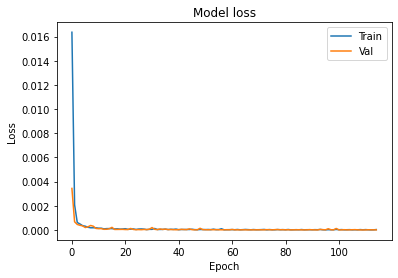

In [13]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

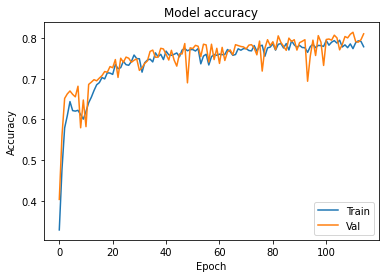

In [14]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy']) 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Evaluate test set

In [15]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 0s 2ms/step - loss: 8.6116e-06 - accuracy: 0.8117


[8.611637895228341e-06, 0.8116666674613953]

# Saving weights

In [16]:
model.save("accuracy30X70_81_207.h5")

# Loading weights

In [4]:
model_1 = tf.keras.models.load_model("accuracy30X70_81_207.h5")

# Prediction

# Getting data to be predicted

In [15]:
data_last = pd.read_csv('abnormalll_test.csv')
data_l = data_last.values
X1 = data_l[: , 30:]
y1 = data_l[: , :30]

In [21]:
for i in range(0, len(X1[0])):
    #X1[0][i] = 0.001*X1[0][i]
    for j in range(1,len(X1)-1):
        X1[j][i] = X1[j-1][i]+ 0.01*X1[j][i]
        
len(X1)

120

# Normalization

In [22]:
scaler_l = MinMaxScaler()
X_l1 = scaler_l.fit_transform(X1)
y_l1 = scaler_l.fit_transform(y1)

# Prediction

In [23]:
a = np.array(X_l1)
b = model_1.predict(a)
b_pred = scaler_l.inverse_transform(b)
print((b_pred[20]-y1[20])/y1[20])
#print(y1[20])

[ 6.00736303e-01  1.77111049e-01 -2.23517418e-08 -2.23517418e-08
 -2.23517418e-08  6.43925658e-01  1.75485229e-01 -1.15483999e-07
 -2.23517418e-08 -2.23517418e-08 -2.23517418e-08 -2.23517418e-08
  5.72636096e-01 -2.08616257e-07 -1.15483999e-07 -3.01748514e-07
 -2.08616257e-07 -2.08616257e-07  6.43655453e-01 -2.23517418e-08
 -2.23517418e-08  6.04042300e-01  5.79310990e-01  7.07805156e-08
 -2.08616257e-07 -2.23517418e-08 -2.08616257e-07 -2.23517418e-08
 -2.23517418e-08 -2.23517418e-08]


# Data visualization

In [25]:
print("set_tmp_values")
c.set_tmp_values(b_pred)

set_tmp_values
